In [282]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [283]:
# taken from the tutorial code provided by the assignment
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

In [284]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    conv_result = im

    # Compute FFT of image
    fft_im = np.fft.fft2(im)

    # todo: ensure that this is a correct solution, since I am not sure if i am suppose to apply the transformation to the fftshift-end result or not

    # shift the zero-frequency component to the center of the spectrum
    # this is done because: "Make sure to shift the zero-frequency component to the center before displaying the amplitude."
    fft_im_shifted = np.fft.fftshift(fft_im)

    # calculate the amplitude (magnitude) BEFORE the transformation
    magnitude_fft_im = magnitude(fft_im_shifted)

    # apply the transformation
    fft_im_result = fft_im * fft_kernel

    # calculate the amplitude (magnitude) AFTER the transformation
    # this is done because: "Make sure to shift the zero-frequency component to the center before displaying the amplitude."
    magnitude_fft_im_result = magnitude(np.fft.fftshift(fft_im_result))

    # apply the inverse transformation
    conv_result = magnitude(np.fft.ifft2(fft_im_result))

    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(np.log(magnitude(fft_im) + 1) , cmap="gray")
        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.log(magnitude(fft_kernel) + 1), cmap="gray")
        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log(magnitude(fft_im_result) + 1), cmap="gray")
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

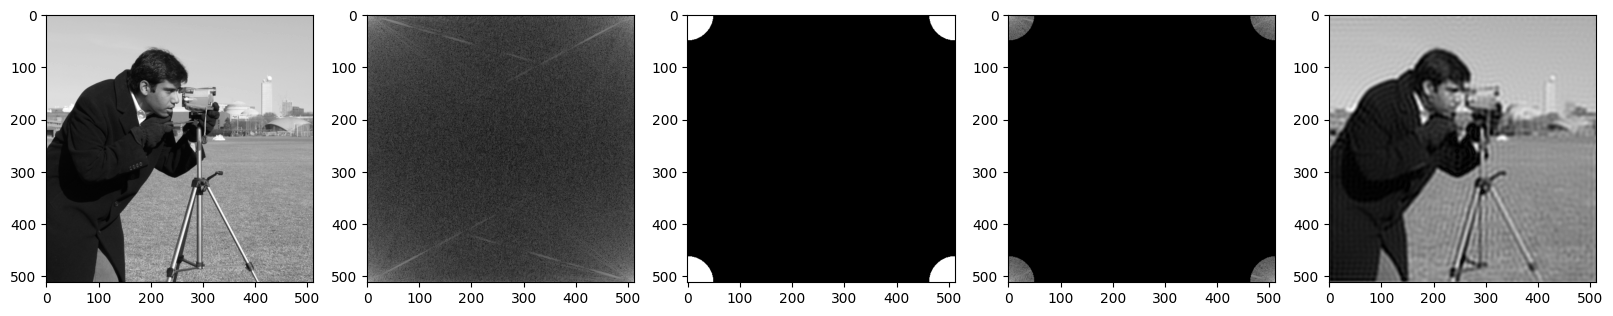

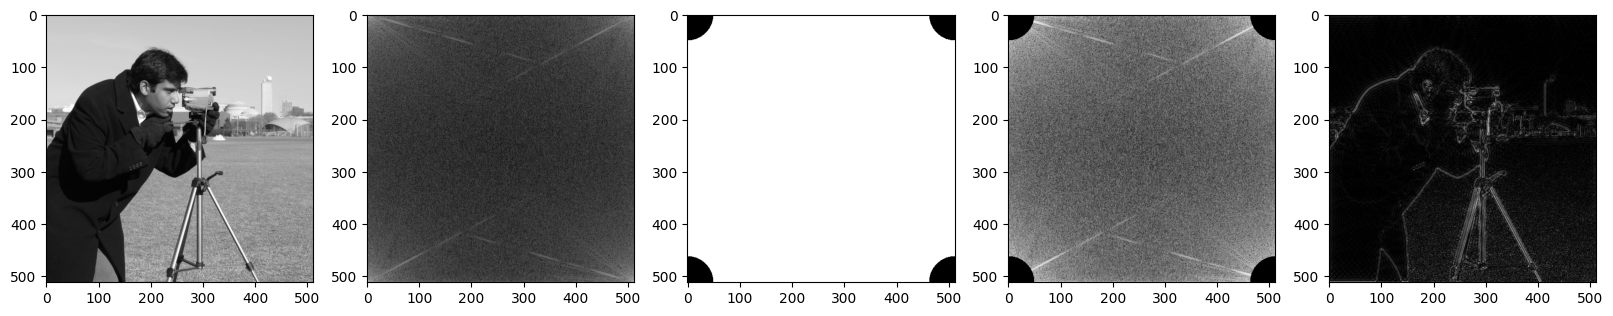

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


In [285]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)